In [1]:
#import some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
import seaborn as sns
from sklearn.decomposition import PCA, IncrementalPCA


## 1. Load the data.csv file and plot using a scatter plot. Find the principal components and visualize them as vectors over the input data. Also, plot the projection of each data point onto the principal axes.


In [90]:
def PCA_(X , num_of_components): # Here, x is a NumPy array    
    #Step-1
    X_meaned = X - np.mean(X , axis = 0) 
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False) 
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_of_components]
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose() 
    return X_reduced,sorted_eigenvectors

In [91]:
# Loading data
data = pd.read_csv("data.csv")

In [92]:
# See first 5 rows
data.head()

,feature1,feature2
0,-0.625302,-0.170064
1,0.960695,0.590901
2,-0.598543,-0.402593
3,-2.228059,-0.532577
4,-0.461430,-0.498867


In [93]:
#chcek shape
data.shape

(200, 2)

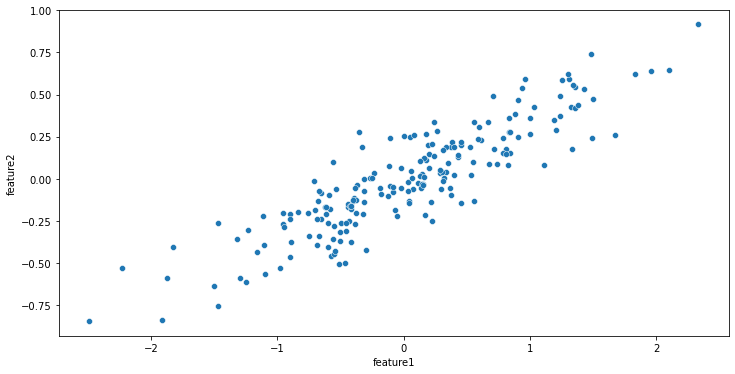

In [94]:
# Scatter Plotting
plt.figure(figsize=(12,6))
sns.scatterplot(x="feature1", y="feature2", data=data)
plt.show()

Find the principal
components and visualize them as vectors over the input data.

In [131]:
# FInding principal components (as vector, dim=1)
data_reduced = PCA_(X=data, num_of_components=2)[0]

In [132]:
# Chcek type  and  shape
type(data_reduced), data_reduced.shape

(numpy.ndarray, (200, 2))

In [134]:
df_reduced = pd.DataFrame(data=data_reduced, columns=["PC1","PC2"])
df_reduced.head()

,PC1,PC2
0,0.676769,-0.059739
1,-1.071214,-0.257240
2,0.727912,0.168670
3,2.309641,-0.244067
4,0.630052,0.304656


In [143]:
princ_axis = PCA_(X=data, num_of_components=2)[1]

In [144]:
princ_axis

array([[-0.94446029,  0.32862557],
       [-0.32862557, -0.94446029]])

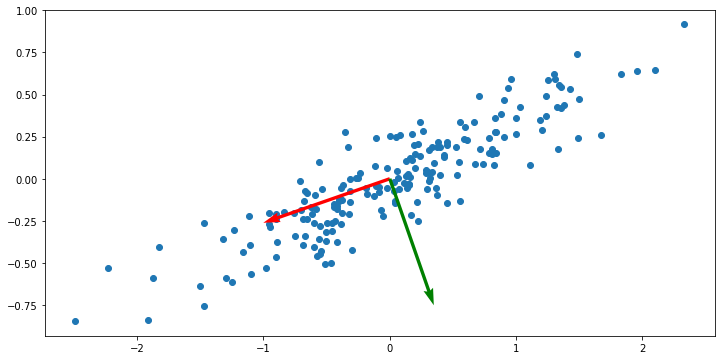

In [153]:
data_ = np.array(data)
plt.figure(figsize=(12,6))
#sns.scatterplot(x="feature1", y="feature2", data=data)
plt.scatter(data_[:,0],data_[:,1])
plt.quiver(0,0,princ_axis.T[0][0], princ_axis.T[0][1] ,scale=5, color=['r'], width=0.005, label="PC1")
plt.quiver(0,0, princ_axis.T[1][0],princ_axis.T[1][1] ,scale=5, color=['g'], width=0.005, label="PC2")
plt.show()

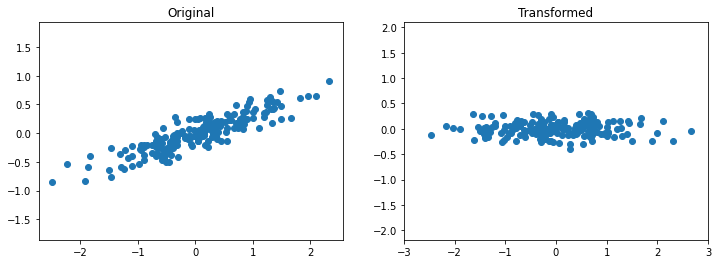

In [136]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].axis('equal')
#axes[0].scatter(data_[:,0], data_[:,1])
axes[0].scatter(data['feature1'], data['feature2'])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(df_reduced['PC1'], df_reduced['PC2'])
axes[0].set_title("Original")
axes[1].set_title("Transformed");

In [137]:
data_reduced.max(), data_reduced.min()

(2.6580358349697173, -2.4708447512565375)

(-1.0, 1.0)

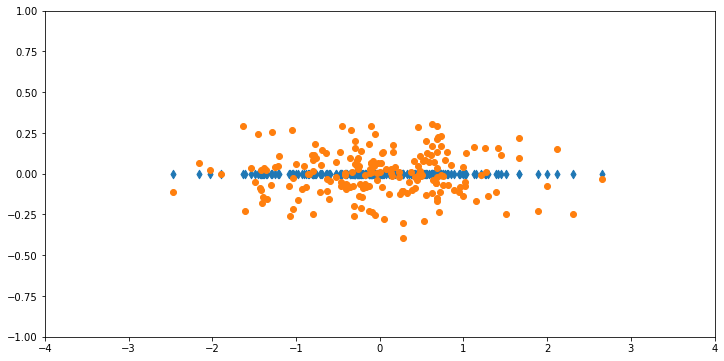

In [142]:
plt.figure(figsize=(12,6))
plt.scatter(df_reduced.iloc[:,0],np.zeros(200), marker="d")
plt.scatter(df_reduced['PC1'], df_reduced['PC2'])
plt.xlim(-4,4)
plt.ylim(-1,1)

## 2. Load the diabetes.csv file and find two principal components. Also, visualize the samples along the two principal components.


In [154]:
# Load the diabetes data
diabetes = pd.read_csv("diabetes.csv")

In [155]:
# see few rows
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [159]:
# sepaerate x (predicted Variables) and y(target variables)

X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [160]:
X_reduced = PCA_(X=X, num_of_components=2)[0]

In [162]:
X_reduced = pd.DataFrame(data=data_reduced, columns=["PC1","PC2"])
X_reduced.head()

,PC1,PC2
0,0.676769,-0.059739
1,-1.071214,-0.257240
2,0.727912,0.168670
3,2.309641,-0.244067
4,0.630052,0.304656


In [163]:
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([X_reduced , pd.DataFrame(y)] , axis = 1)
principal_df.head()

,PC1,PC2,Outcome
0,0.676769,-0.059739,1
1,-1.071214,-0.257240,0
2,0.727912,0.168670,1
3,2.309641,-0.244067,0
4,0.630052,0.304656,1


Now, visualize the samples along the two principal components.


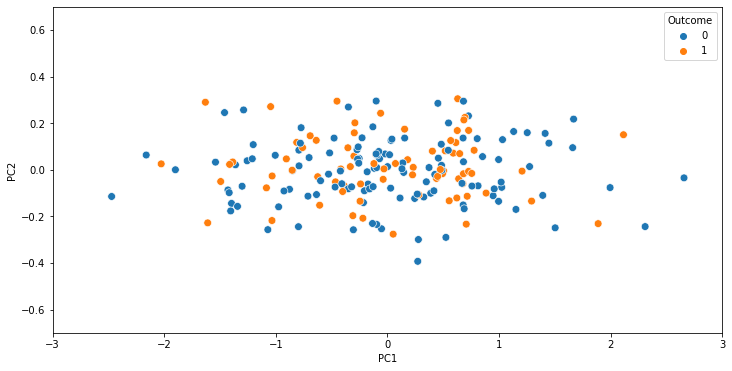

In [165]:
plt.figure(figsize = (12,6))
sns.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'Outcome' , s = 60 ,)
plt.xlim(-3,3)
plt.ylim(-0.7,0.7)
plt.show()